# Import the Dataset

In [48]:
%pip install transformers

     ---------------------------------------- 7.2/7.2 MB 14.8 MB/s eta 0:00:00
     ------------------------------------- 263.9/263.9 kB 15.9 MB/s eta 0:00:00
     ------------------------------------- 268.8/268.8 kB 16.2 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 20.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import seaborn as sns

# A dependency of the preprocessing for BERT inputs


In [71]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#from official.nlp import optimization

import matplotlib.pyplot as plt
print(tf.__version__)

2.9.1


In [1]:
pip install tf-models-official==2.9.1

  Using cached tf_models_official-2.9.1-py2.py3-none-any.whl (2.1 MB)
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached tensorflow_addons-0.21.0-cp39-cp39-win_amd64.whl (729 kB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached tensorflow_model_optimization-0.7.5-py2.py3-none-any.whl (241 kB)
  Using cached kaggle-1.5.15-py3-none-any.whl
  Using cached sacrebleu-2.3.1-py3-none-any.whl (118 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tensorflow_datasets-4.9.2-py3-none-any.whl (5.4 MB)
  Using cached google_api_python_client-2.93.0-py2.py3-non

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [16 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  C:\Users\varsh\AppData\Local\Temp\pip-build-env-7q5kxg65\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\varsh\AppData\Local\Temp\pip-install-abi1fi_g\pycocotools_afc5d35c34b64d6a94587fed801ca890\pycocotools\_mask.pyx

In [68]:
!pip install -q tf-models-official

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [16 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  C:\Users\varsh\AppData\Local\Temp\pip-build-env-gjpzj3x2\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\varsh\AppData\Local\Temp\pip-install-_7atv91g\pycocotools_6618b05ba24346228bfce60aa845d685\pycocotools\_mask.pyx

In [3]:
!ls -lha kaggle.json

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
#sample_submission = pd.read_csv('dataset/sample_submission.csv')

In [24]:
df_train.head()
len(df_train)

6001

# Cleaning the Text


Convert location and text to Lowercase for train and test dataset

In [6]:
#TRAIN
df_train['location'] = df_train['location'].str.lower()
df_train['text'] = df_train['text'].str.lower()

#TEST
df_test['location'] = df_test['location'].str.lower()
df_test['text'] = df_test['text'].str.lower()


In [7]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,"heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,apocalypse lighting. #spokane #wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan


Remove URL's from text column for train and test dataset

Drop Duplicates

In [8]:
print(len(df_train))
df_train = df_train.drop_duplicates('text', keep='last')
print(len(df_train))

7613
7502


C:\Users\varsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

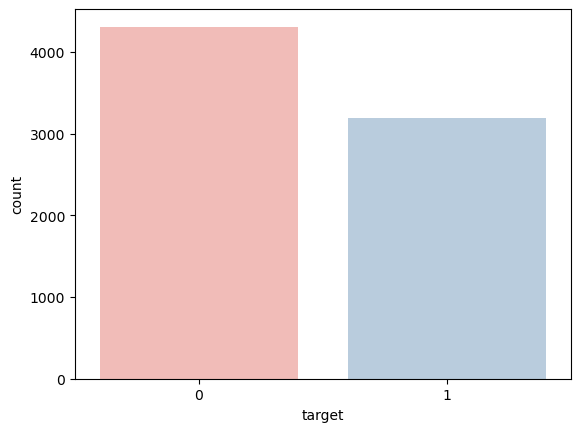

In [9]:
sns.countplot(df_train['target'], palette = 'Pastel1')

1: Disaster Tweets = 3196; 
0: Not Disaster Tweets = 4307

In [10]:
df_train['target'].value_counts()

0    4307
1    3195
Name: target, dtype: int64

Unique keywords in Train_data = 222
Unique keywords in Test_data = 222


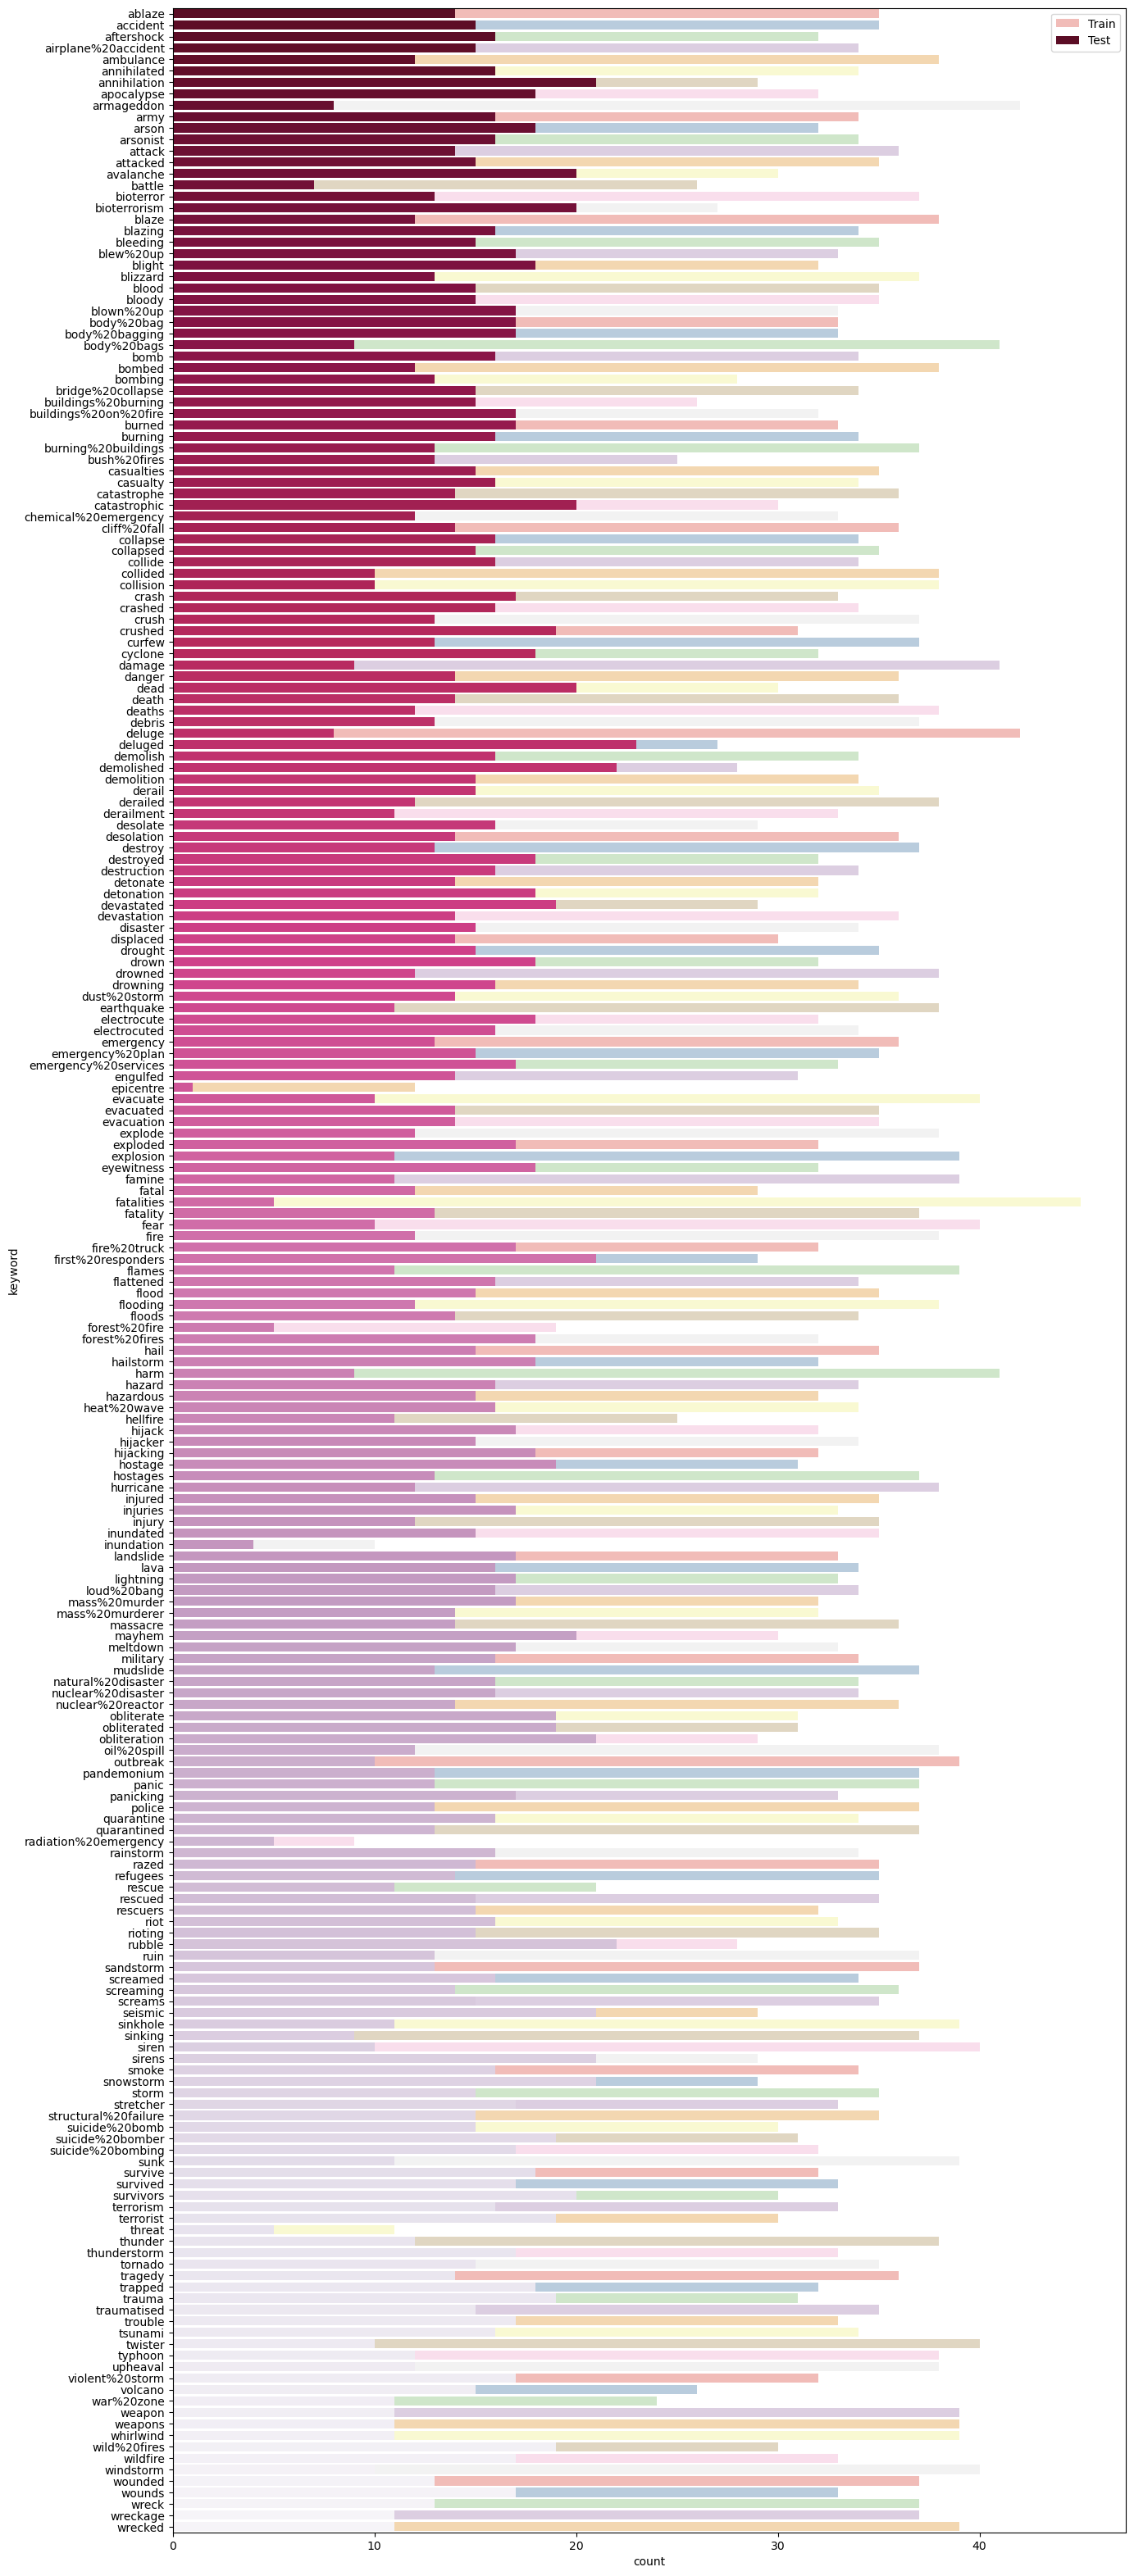

In [11]:
plt.figure(figsize=(15,40))

print(f'Unique keywords in Train_data = {len(df_train.keyword.unique())}')
print(f'Unique keywords in Test_data = {len(df_test.keyword.unique())}')

sns.countplot(y = df_train['keyword'], palette = 'Pastel1' , label ='Train')
sns.countplot(y = df_test['keyword'], palette = 'PuRd_r', label ='Test')

plt.legend()

Keywords in disaster and not disaster tweets

<AxesSubplot:xlabel='count', ylabel='keyword'>

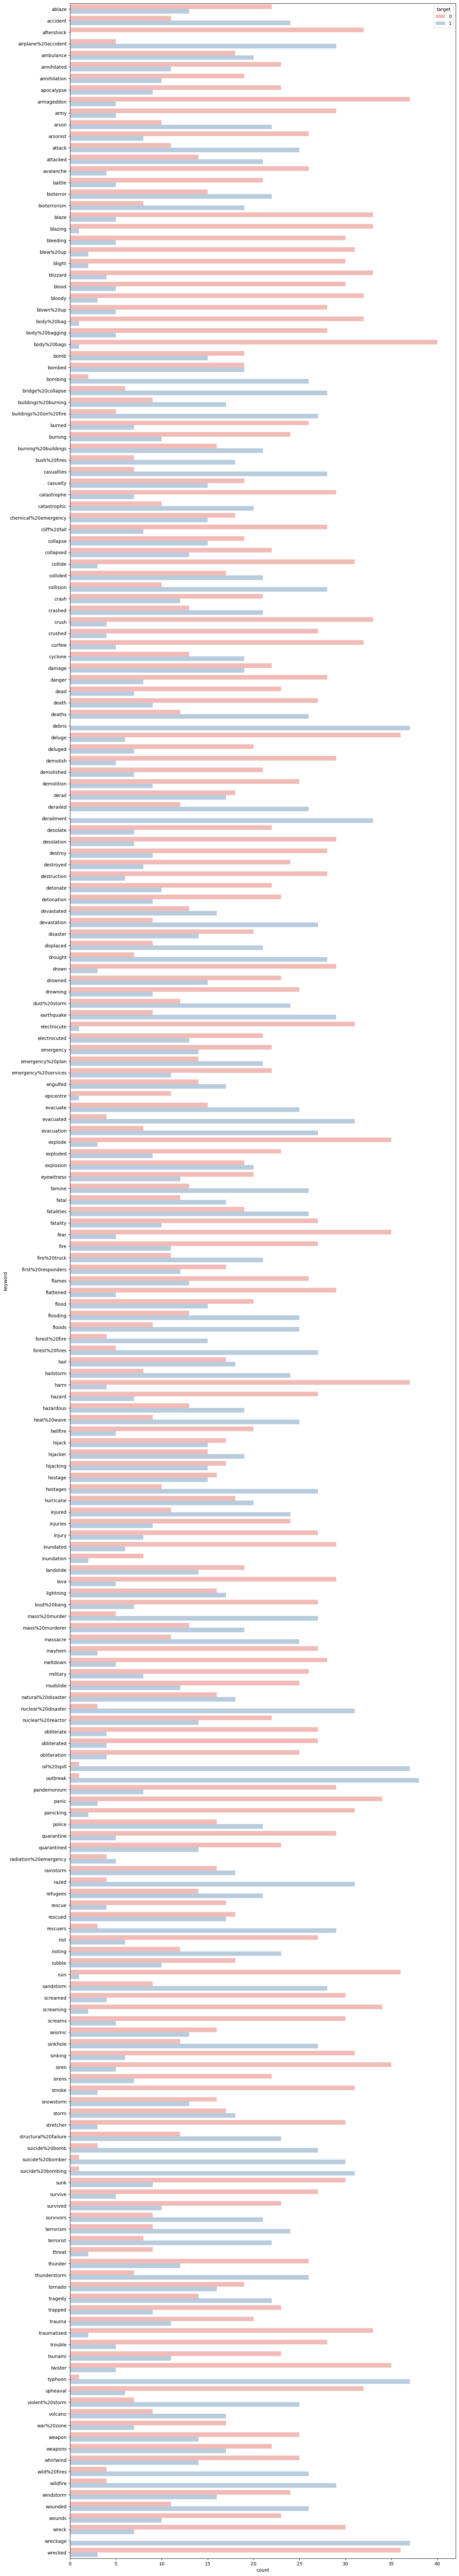

In [12]:
plt.figure(figsize=(15,100))
sns.countplot(data = df_train, y = 'keyword', hue = 'target' , palette = 'Pastel1')

In [25]:
def clean_data(dataframe):
#replace URL of a text
    dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

clean_data(df_train)
clean_data(df_test)
len(df_train)
len(df_test)

C:\Users\varsh\AppData\Local\Temp\ipykernel_10864\1381580212.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


3263

In [14]:
df_test.head()
#print(df_train.iloc[33])

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,"heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,apocalypse lighting. #spokane #wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan


In [54]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [56]:
import re

def preprocess_text(text):
      #text = re.sub(r"http\S+", "", text)
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    #text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    #text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    #text = re.sub(SEQPATTERN,SEQREPLACE,text)
    #text = text.split()
    #text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    #text = ' '.join(text)
    return text

train_df.head(15)

,id,keyword,location,text,target
3911,5561,flood,boston,when fizzy is sitting in the regular flood sea...,0
4676,6647,inundation,NaN,beyond all bounds; till inundation rise,0
5406,7717,panicking,NaN,people are finally panicking about cable tv,0
2990,4297,drowning,"san diego, california",i'm drowning in hw now and that's w/o going to...,0
2542,3647,desolation,???????? ?????????.,my chemical romance ûó desolation row #np,0
3250,4671,engulfed,NaN,men escape car engulfed in flames in parley's ...,1
3732,5304,fear,indonesia,the fear of the lord is the start of knowledge...,0
1317,1901,burning,??t?a,now playing: boat club - memories on london bu...,0
430,623,arsonist,"adelaide, south australia",arsonists being blamed for a blaze at a plasti...,0
1625,2348,collapse,"pompano beach, fl",growth dries up for bhp billiton as oil price ...,0


In [ ]:
batch_size = 32
seed = 42
train_ds = tf.data.Dataset.from_tensor_slices((df_train['text'].tolist(),df_train['target'].tolist())).batch(batch_size)
#valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,y_valid)).batch(batch_size)
#print(train_ds)